In [5]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,label
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,6744064,6799360.0,524.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,28.0,899075.0,13.857079,Win32 EXE PECompact compressed (generic),64.2,-3.978981,5.732354,er,1
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,22016,45056.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,856.0,9.617978,Win32 Dynamic Link Library (generic),38.4,7.064133,5.738201,er,0
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,686136,704512.0,133.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2.0,32767.0,12.140422,Win64 Executable (generic),82.0,1.052727,5.722733,gow,0
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192,36864.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,678.0,9.549296,Win64 Executable (generic),28.0,2.217531,5.896053,vh,1
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,396288,421888.0,133.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,5.0,35881.0,7.587439,Win64 Executable (generic),32.2,9.401164,NaN,vh,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sha256               60000 non-null  object 
 1   size                 60000 non-null  int64  
 2   vsize                58065 non-null  float64
 3   imports              58261 non-null  float64
 4   exports              57907 non-null  float64
 5   has_debug            57073 non-null  float64
 6   has_relocations      56676 non-null  float64
 7   has_resources        58039 non-null  float64
 8   has_signature        58063 non-null  float64
 9   has_tls              57102 non-null  float64
 10  symbols              57344 non-null  float64
 11  numstrings           57282 non-null  float64
 12  paths                56340 non-null  float64
 13  urls                 57651 non-null  float64
 14  registry             57475 non-null  float64
 15  MZ                   56911 non-null 

In [45]:
# Calculate the percentage of malicious files with symbols greater than zero
percent_symbols_gt_zero = (df[(df['symbols'] > 0) & (df['label'] == 1)].shape[0] / df[df['label'] == 1].shape[0]) * 100

# Calculate the percentage of malicious files with zero symbols
percent_symbols_zero = (df[(df['symbols'] == 0) & (df['label'] == 1)].shape[0] / df[df['label'] == 1].shape[0]) * 100

percent_symbols_nan = (df[(df['symbols'].isna()) & (df['label'] == 1)].shape[0] / df[df['label'] == 1].shape[0]) * 100

# Print the results
print(f"Percentage of malicious files with symbols greater than zero: {percent_symbols_gt_zero:.2f}%")
print(f"Percentage of malicious files with zero symbols: {percent_symbols_zero:.2f}%")
print(f"Percentage of malicious files with nan num of symbols: {percent_symbols_nan:.2f}%")

Percentage of malicious files with symbols greater than zero: 0.42%
Percentage of malicious files with zero symbols: 95.07%
Percentage of malicious files with nan num of symbols: 4.51%


In [47]:
#try something with the symbols feature
more_than_zero_symbols = len(df[df['symbols'] > 0])
zero_symbols = len(df[df['symbols'] == 0])
nan_symbols = df['symbols'].isnull().sum()
print(f"more than zero symbols: {more_than_zero_symbols}, zero symbols: {zero_symbols}, nan symbols: {nan_symbols}")

more than zero symbols: 577, zero symbols: 56767, nan symbols: 2656


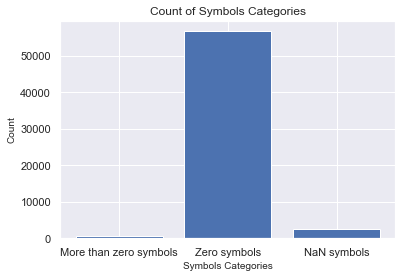

In [48]:
symbols_categories = ['More than zero symbols', 'Zero symbols', 'NaN symbols']
symbols_counts = [more_than_zero_symbols, zero_symbols, nan_symbols]

plt.bar(symbols_categories, symbols_counts)
plt.xlabel('Symbols Categories')
plt.ylabel('Count')
plt.title('Count of Symbols Categories')
plt.show()

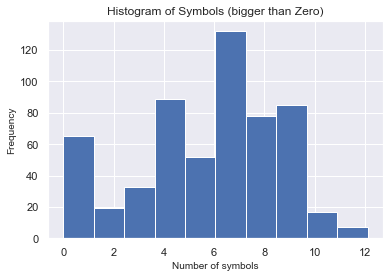

In [49]:
# Create a histogram of the 'symbols' column
symbols_zero = df[df['symbols'] > 0]['symbols']
symbols_zero_log = np.log(symbols_zero)

# Create a histogram using the filtered data
plt.hist(symbols_zero_log, bins=10)
plt.xlabel('Number of symbols')
plt.ylabel('Frequency')
plt.title('Histogram of Symbols (bigger than Zero)')
plt.show()

C:\Users\Acer\AppData\Local\Temp/ipykernel_35796/406889309.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


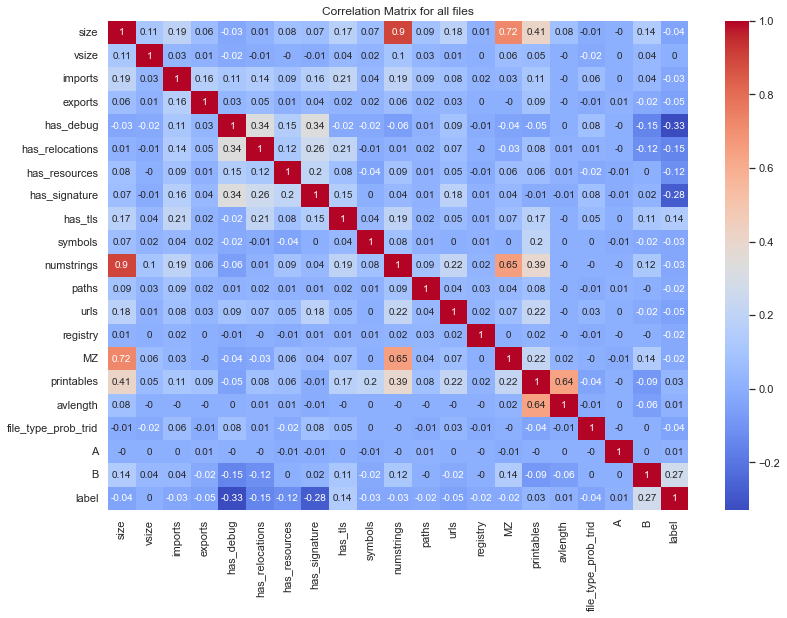

In [50]:
#corr for all of the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
correlation_matrix = df.corr().round(2)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(13, 9))
plt.title('Correlation Matrix for all files')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\Acer\AppData\Local\Temp/ipykernel_35796/2844959389.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[df['label']==1].corr().round(2)


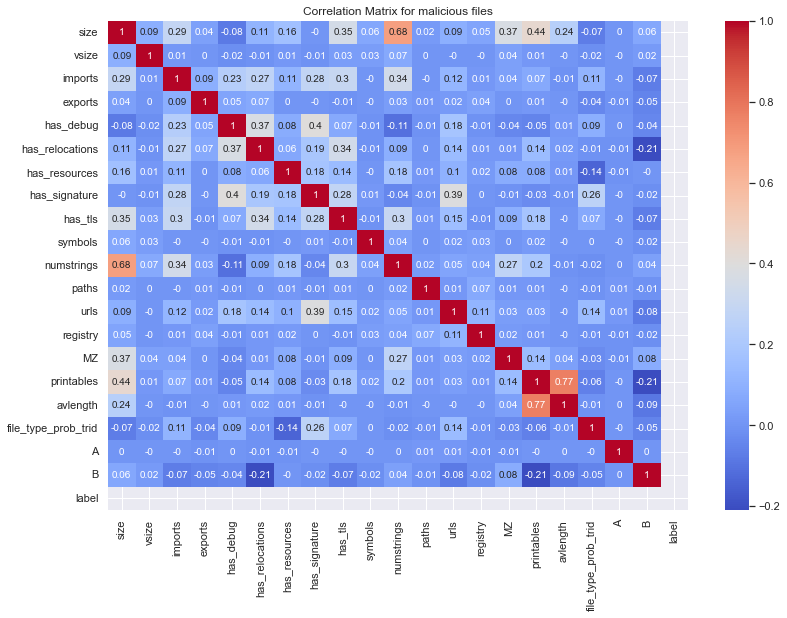

In [51]:
#corr for only the malicious file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
correlation_matrix = df[df['label']==1].corr().round(2)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(13, 9))
plt.title('Correlation Matrix for malicious files')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\Acer\AppData\Local\Temp/ipykernel_35796/85566398.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[df['label']==0].corr().round(2)


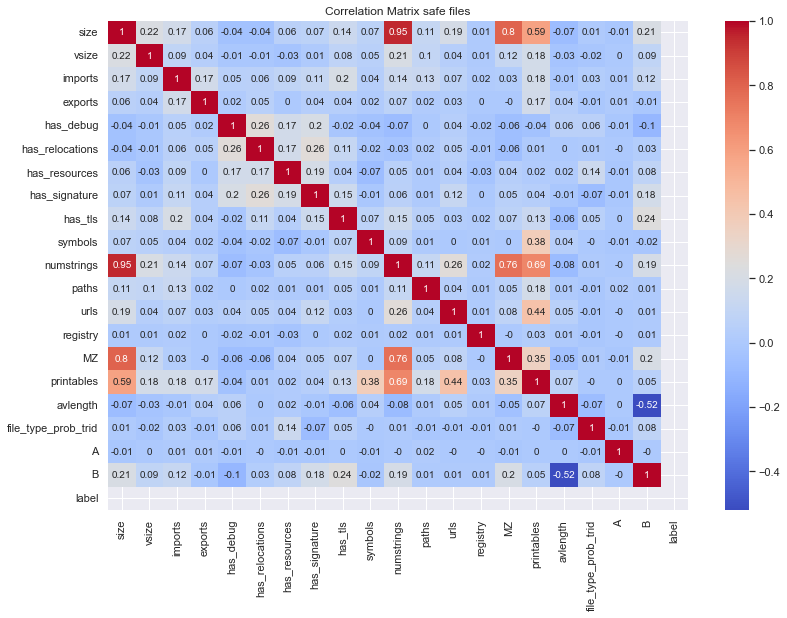

In [52]:
#corr for only the safe file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
correlation_matrix = df[df['label']==0].corr().round(2)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(13, 9))
plt.title('Correlation Matrix safe files')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

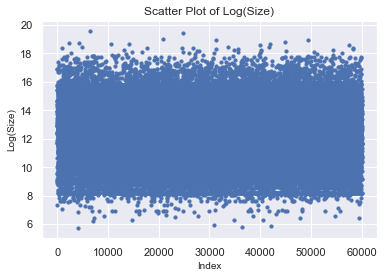

In [53]:
# Apply logarithm transformation to the 'size' feature
log_size = np.log(df['size'])

# Create a scatter plot
plt.scatter(df.index, log_size, s=10)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Log(Size)')
plt.title('Scatter Plot of Log(Size)')

# Show the plot
plt.show()

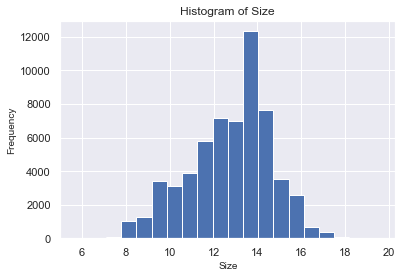

In [54]:
# Create the histogram
plt.hist(log_size, bins=20)

# Set labels and title
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Histogram of Size')

# Show the plot
plt.show()

#looks normal distribution!